In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('tableau-colorblind10')

In [23]:
# set graphics parameter
large=22; med =16; small = 12

params= {'figure.figsize':(16,10),
        'axes.titlesize':large,
        'axes.labelsize':med,
        'legend.fontsize':med,
        'xtick.labelsize':small,
        'ytick.labelsize':small}

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style('white')

In [24]:
mpg = pd.read_csv('mpg.csv')
mpg.loc[mpg.cyl==5]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
217,volkswagen,jetta,2.5,2008,5,auto(s6),f,21,29,r,compact
218,volkswagen,jetta,2.5,2008,5,manual(m5),f,21,29,r,compact
225,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact
226,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29,r,subcompact


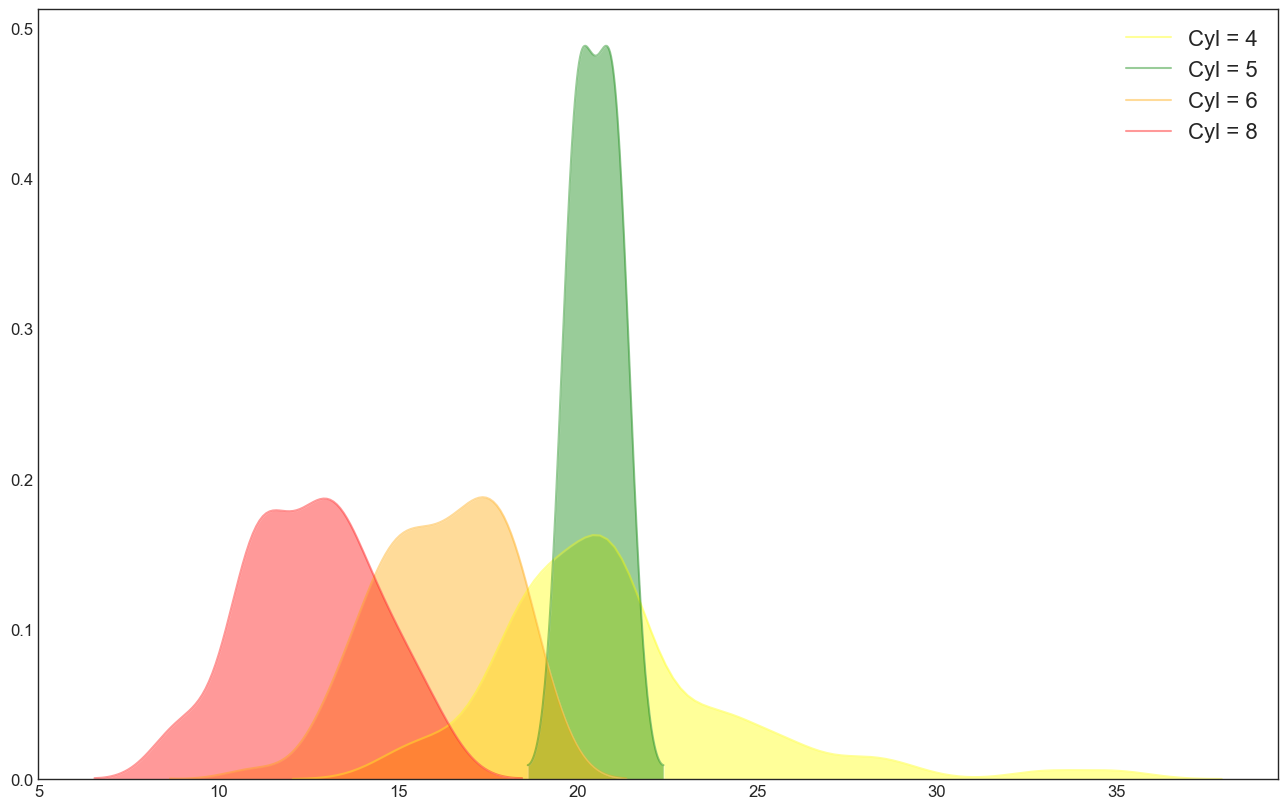

In [25]:
#Density Plot

plt.figure()

#Existed Density Plot Function
sns.kdeplot(mpg.loc[mpg.cyl==4,'cty'],
           shade=True,
           color='yellow',
            alpha = 0.4,
           label='Cyl = 4')
sns.kdeplot(mpg.loc[mpg.cyl==5,'cty'],
           shade=True,
           color='green',
            alpha = 0.4,
           label='Cyl = 5')
sns.kdeplot(mpg.loc[mpg.cyl==6,'cty'],
           shade=True,
           color='orange',
            alpha = 0.4,
           label='Cyl = 6')
sns.kdeplot(mpg.loc[mpg.cyl==8,'cty'],
           shade=True,
           color='red',
            alpha = 0.4,
           label='Cyl = 8')

plt.show()

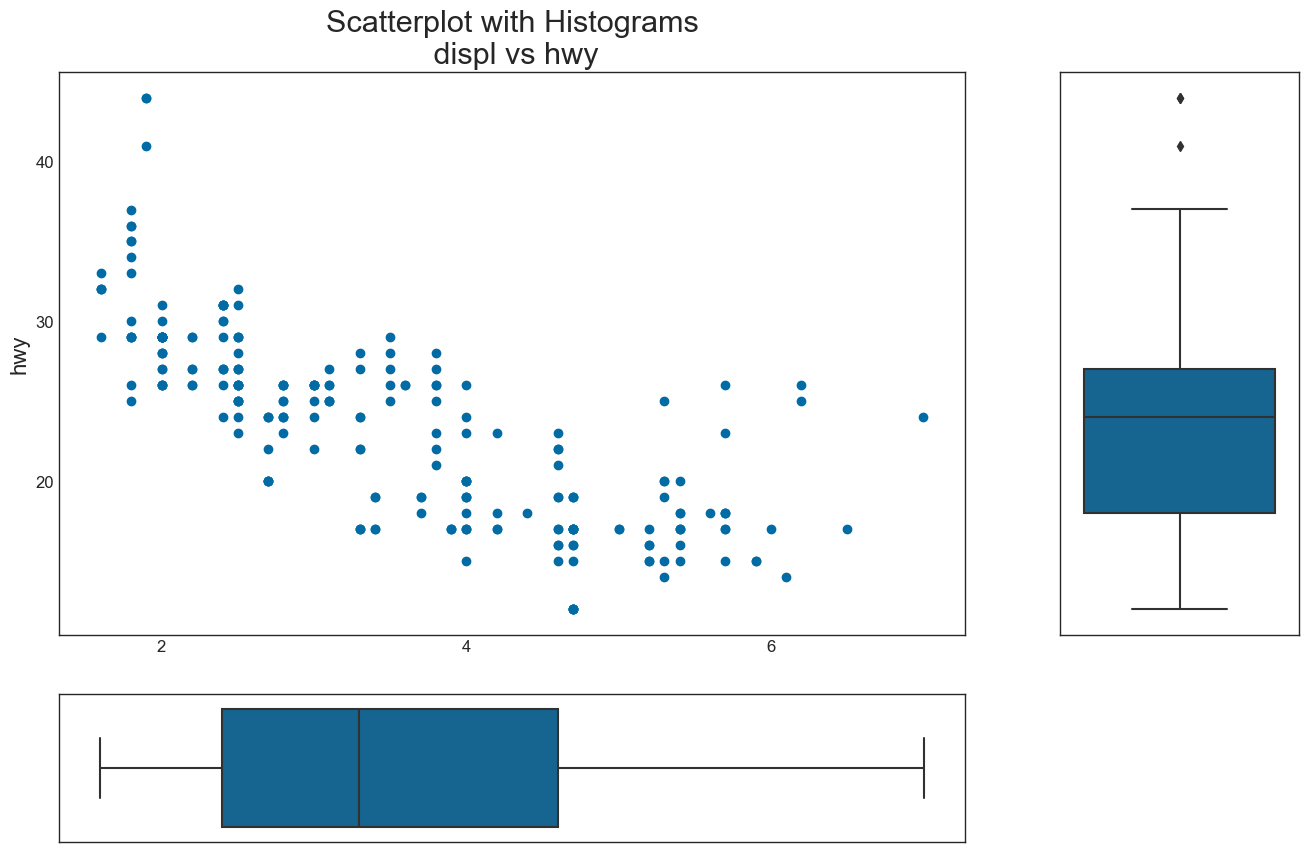

In [26]:
#Marginal Boxplot

fig = plt.figure()

grid = plt.GridSpec(4,4,wspace = 0.4, hspace = 0.4)

ax_main = fig.add_subplot(grid[0:3,0:3])
ax_right = fig.add_subplot(grid[0:3,3])
ax_bottom = fig.add_subplot(grid[3,0:3])

#Main graph
ax_main.scatter(mpg.displ, mpg.hwy)
ax_main.set(xticks=[2,4,6],yticks=[20,30,40],ylabel='hwy',
           title = 'Scatterplot with Histograms\n displ vs hwy')

#Right graph
sns.boxplot(mpg.hwy, ax = ax_right, orient = 'v')
ax_right.set(xticks=[],yticks=[],ylabel='')

#Bottom graph
sns.boxplot(mpg.displ, ax = ax_bottom, orient = 'h')
ax_bottom.set(xticks=[],yticks=[],xlabel='')

plt.show()

In [27]:
#groupby(grouping by which)[look at what]
mpg.groupby('manufacturer')['cty'].mean()

manufacturer
audi          17.611111
chevrolet     15.000000
dodge         13.135135
ford          14.000000
honda         24.444444
hyundai       18.642857
jeep          13.500000
land rover    11.500000
lincoln       11.333333
mercury       13.250000
nissan        18.076923
pontiac       17.000000
subaru        19.285714
toyota        18.529412
volkswagen    20.925926
Name: cty, dtype: float64

In [28]:
datavis = mpg[['cty','manufacturer']].groupby('manufacturer').mean()
datavis.reset_index(inplace=True)
#inplace = update index in place without needing to overwrite it

In [29]:
datavis.sort_values('cty', inplace=True)

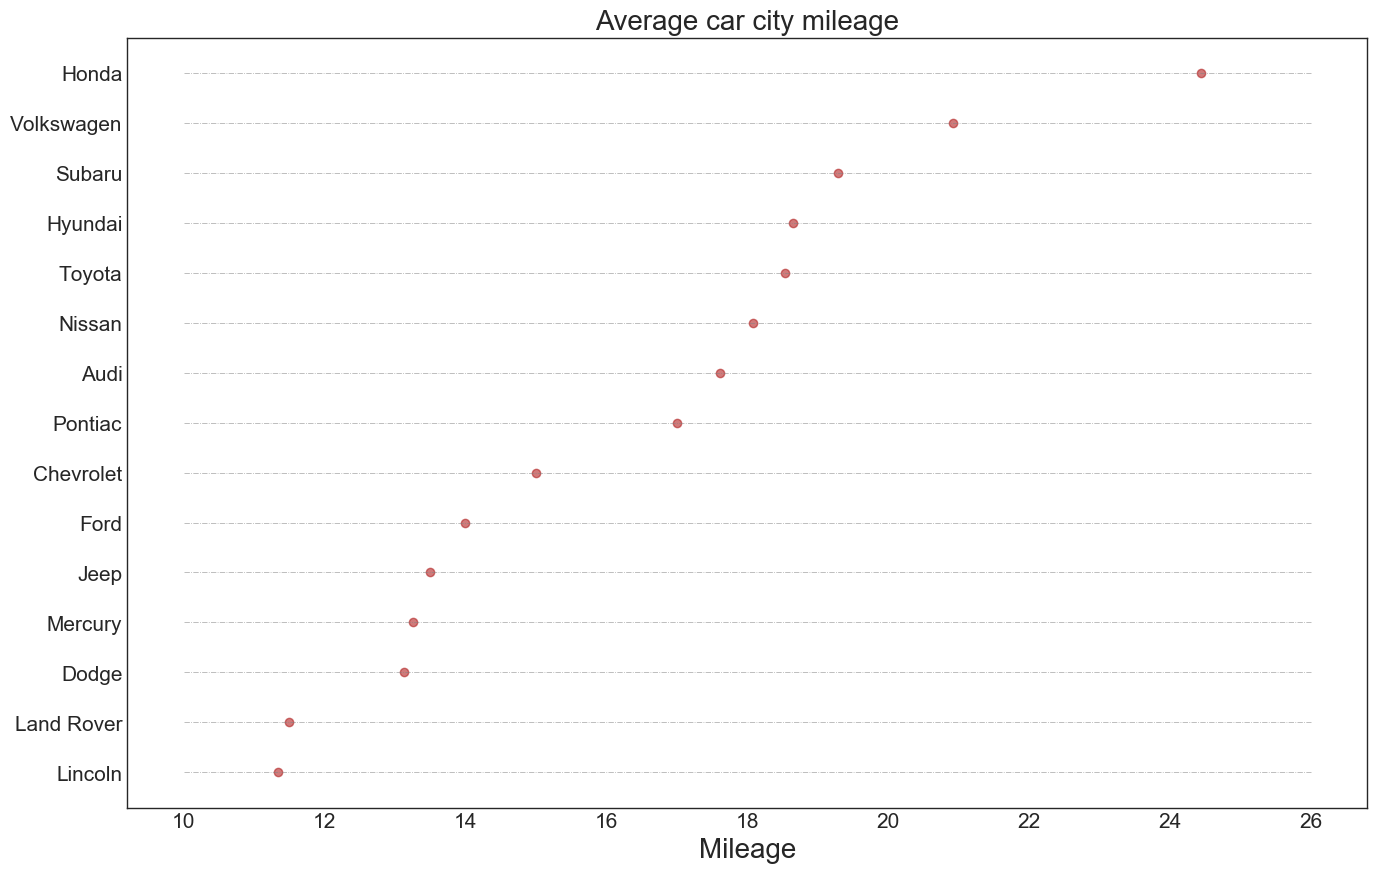

In [30]:
plt.figure()
#.str.title makes it titleize
plt.scatter(x=datavis.cty,
            y=datavis.manufacturer.str.title(),
           color='firebrick',
           alpha=0.6)

ax=plt.gca()
ax.hlines(y=datavis.manufacturer.str.title(), xmin=10, xmax=26,color='gray',alpha=0.6, linestyle='-.', linewidth=0.6)

plt.title('Average car city mileage', fontsize=20)
plt.xlabel('Mileage',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#delete the yticks line
ax.yaxis.set_ticks_position('none')
plt.show()

In [31]:
# Create new column in dataset
mpg['cty_z'] = (mpg.cty-mpg.cty.mean())/mpg.cty.std()
datavis=mpg[['cty_z','manufacturer']].groupby('manufacturer').mean().sort_values('cty_z').reset_index()

In [32]:
# Create color variable for the bars
datavis['col']=['red' if i<0 else 'green' for i in datavis.cty_z]
datavis

,manufacturer,cty_z,col
0,lincoln,-1.298334,red
1,land rover,-1.259174,red
2,dodge,-0.874973,red
3,mercury,-0.847984,red
4,jeep,-0.789243,red
5,ford,-0.671760,red
6,chevrolet,-0.436795,red
7,pontiac,0.033136,green
8,audi,0.176726,green
9,nissan,0.286176,green


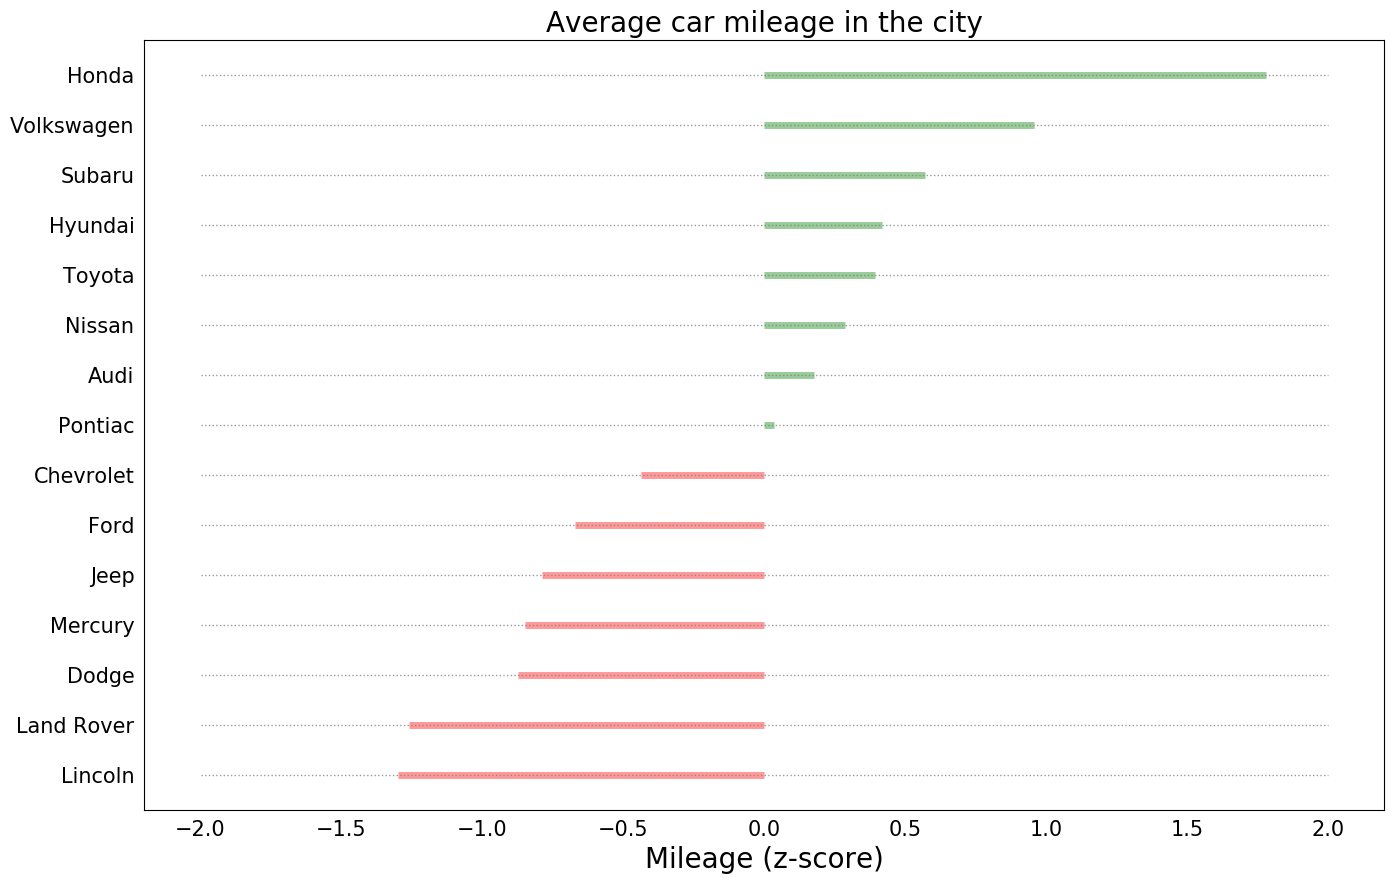

In [33]:
plt.figure()
plt.style.use('default')
ax=plt.gca()

ax.hlines(y=datavis.manufacturer.str.title(),
        xmin=0,
        xmax=datavis.cty_z,
         color = datavis.col, linewidth=5, alpha=0.4)
ax.hlines(y=datavis.manufacturer.str.title(),
          xmin=-2,
          xmax=2,
          color='gray',alpha=0.8, linestyle=':', linewidth=1)

plt.title('Average car mileage in the city', fontsize=20)
plt.xlabel('Mileage (z-score)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
plt.savefig('./test3.jpg')
plt.show()

In [34]:
import seaborn as sns

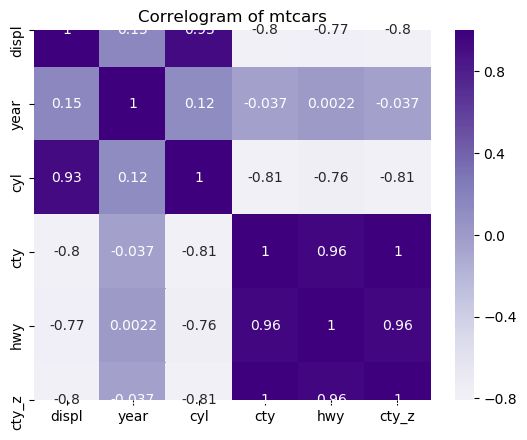

In [35]:
plt.figure()

sns.heatmap(mpg.corr(),
           cmap='Purples',
            center = 0,
           annot=True)
# annot = show the number on the bricks
# center = the center value of the colors

plt.title('Correlogram of mtcars')
plt.show()

<Figure size 640x480 with 0 Axes>

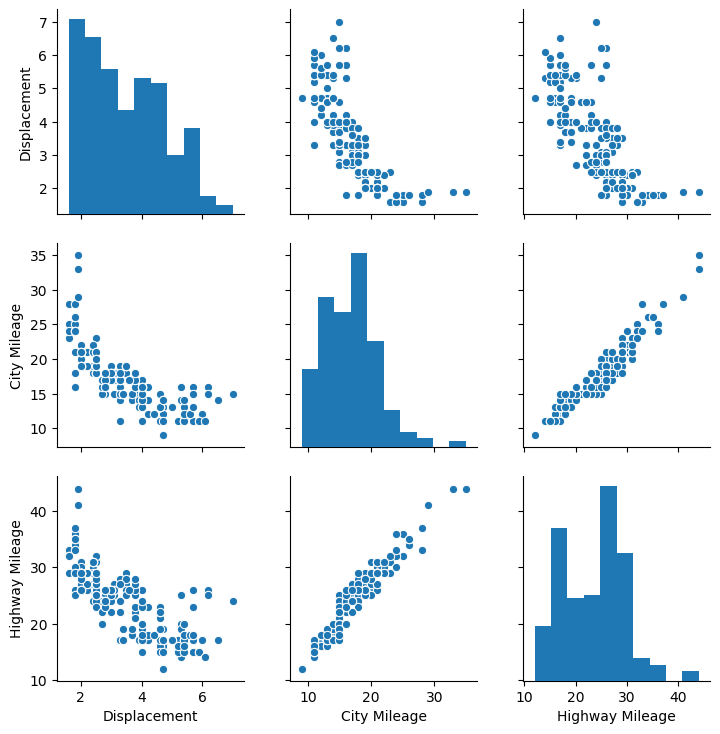

In [36]:
plt.figure()

# Focusing on which data only
datavis=mpg[['displ','cty','hwy']]
datavis.columns = ['Displacement', 'City Mileage', 'Highway Mileage']

#kind=reg add regression lines
sns.pairplot(datavis)
plt.show()

<Figure size 640x480 with 0 Axes>

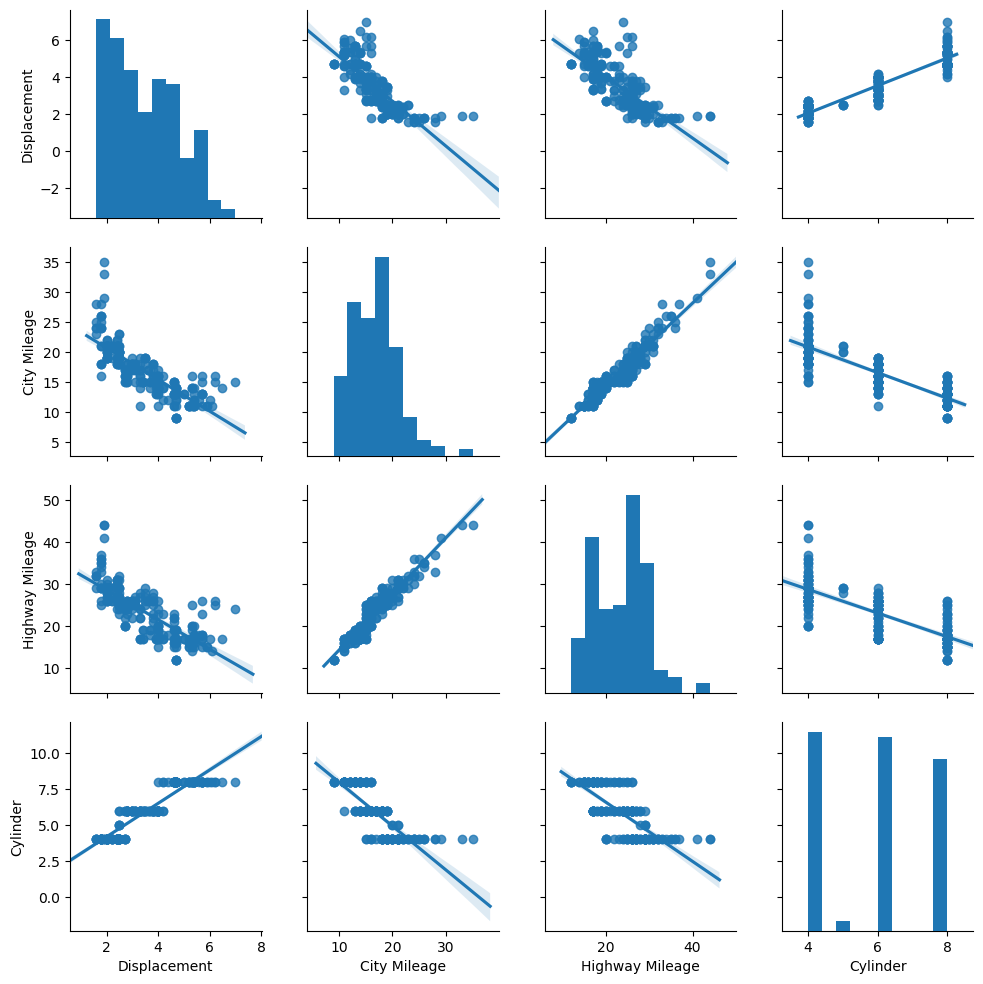

In [37]:
plt.figure()

# Focusing on which data only
datavis=mpg[['displ','cty','hwy','cyl']]
datavis.columns = ['Displacement', 'City Mileage', 'Highway Mileage','Cylinder']

#kind=reg add regression lines
sns.pairplot(datavis, kind='reg')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 640x480 with 0 Axes>

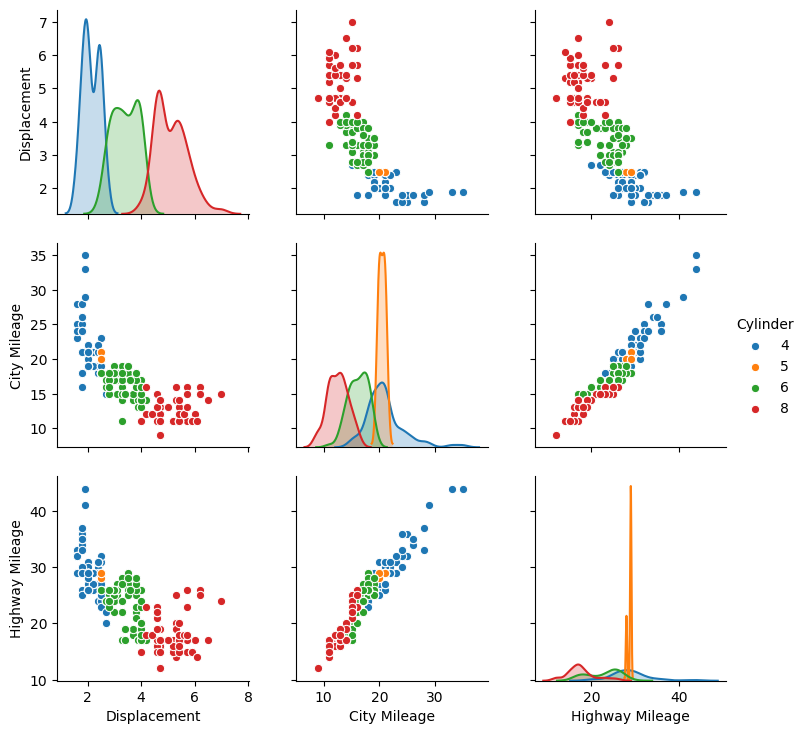

In [38]:
# Focusing on which data only
datavis=mpg[['displ','cty','hwy','cyl']]
datavis.columns = ['Displacement', 'City Mileage', 'Highway Mileage','Cylinder']

plt.figure()
#kind=reg add regression lines
sns.pairplot(datavis,
             x_vars = ['Displacement', 'City Mileage', 'Highway Mileage'],
             y_vars = ['Displacement', 'City Mileage', 'Highway Mileage'],
             hue = 'Cylinder'
            )
plt.show()

In [39]:
import squarify as sq

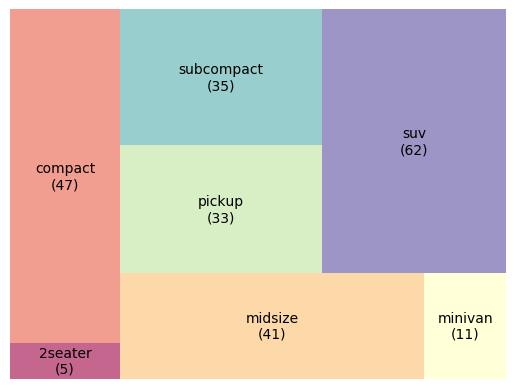

In [40]:
df = mpg.groupby('class').size().reset_index(name = "counts")
labels = df.apply(lambda x:str(x[0])+ "\n" +"(" +str(x[1]) + ")", axis = 1)
colors = plt.get_cmap('Spectral')(np.linspace(0,1,len(labels)))

plt.figure()
sq.plot(sizes = df['counts'], label = labels, color = colors, alpha = 0.6)
plt.axis('off')
plt.show()